In [12]:
#importing the libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import joblib


#import the data from file
df = pd.read_csv('sales.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [13]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [14]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [15]:
df.shape

(200, 4)

C:\Users\Vinit\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


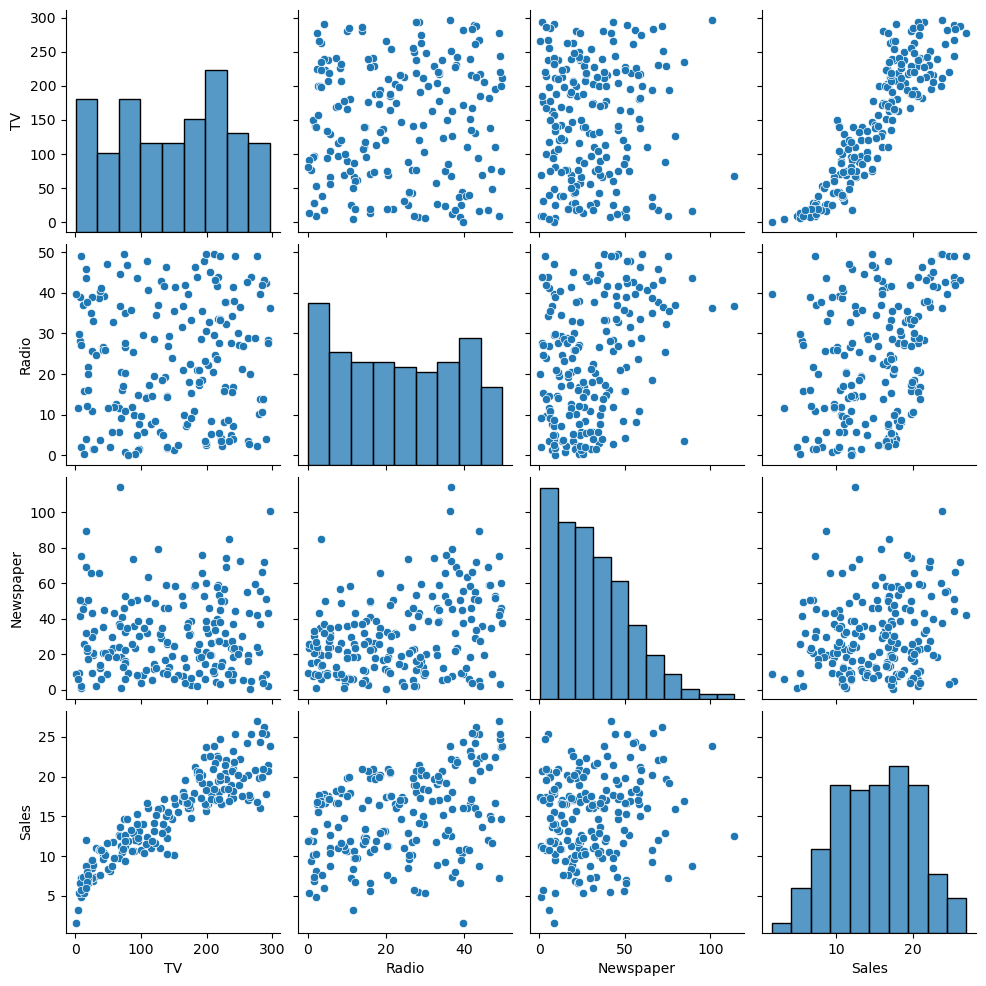

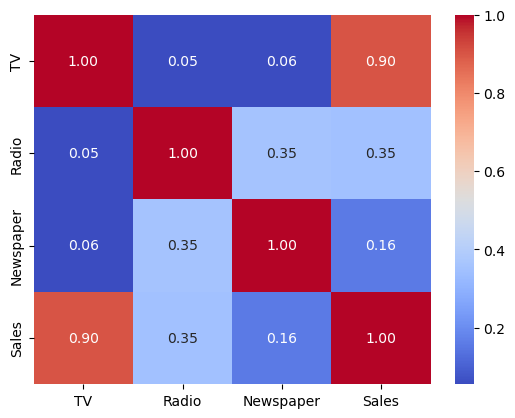

In [16]:
# performing the EDA for more infromation on the data

# Pairploting to visualize relationships between variables
sns.pairplot(df)
plt.show()

# heatmap
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


In [23]:
# building the model

X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')



Mean Squared Error: 2.907756910271091


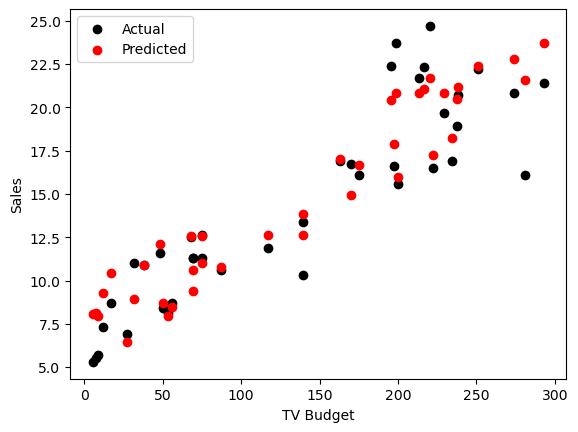

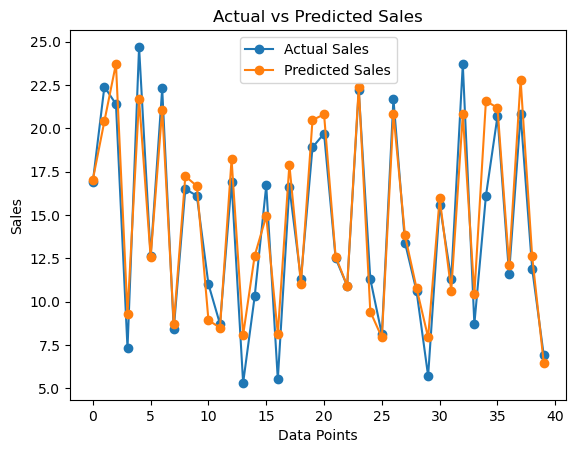

In [22]:
# Visualize result using scatter plot
plt.scatter(X_test['TV'], y_test, color='black', label='Actual')
plt.scatter(X_test['TV'], y_pred, color='red', label='Predicted')
plt.xlabel('TV Budget')
plt.ylabel('Sales')
plt.legend()
plt.show()



# Visualize result using line graph
plt.plot(y_test.values, label='Actual Sales', marker='o')
plt.plot(y_pred, label='Predicted Sales', marker='o')
plt.xlabel("Data Points")
plt.ylabel("Sales")
plt.title("Actual vs Predicted Sales")
plt.legend()
plt.show()

In [21]:
# Saving the model
joblib.dump(model, 'linear_regression_model.joblib')
print('Model saved')

Model saved
